# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

In [24]:
#Ejercicio 1
import requests
# URL base de la API del buscador de Mercado Libre
url_base = "https://api.mercadolibre.com/sites/MLA/search"
# Parámetros de búsqueda
params = {
    "q": "Apple Macbook Air",
    "limit": 10
}
# Realizamos la solicitud GET a la API de Mercado Libre
response = requests.get(url_base, params=params)
# Comprobamos si la solicitud fue exitosa (código de respuesta 200)
if response.status_code == 200:
    # Parsear (interpretar) la respuesta JSON
    data = response.json()    
    # Obtener la lista de ítems
    items = data.get("results", [])   
    # Iterar sobre los ítems y mostrar información relevante
    for item in items:
        print("Título:", item.get("title"))
        print("Precio:", item.get("price"))
        print("Condición:", item.get("condition"))
        print("Vendedor:", item.get("seller").get("id"))
        print("------------")
else:
    print("Error al realizar la solicitud a la API")

Título: Apple Macbook Air (13 Pulgadas, 2020, Chip M1, 256 Gb De Ssd, 8 Gb De Ram) - Gris Espacial - Distribuidor Autorizado
Precio: 907199.1
Condición: new
Vendedor: 195832229
------------
Título: Apple Macbook Air (13 Pulgadas, 2020, Chip M1, 256 Gb De Ssd, 8 Gb De Ram) - Gris Espacial
Precio: 710000
Condición: new
Vendedor: 148027380
------------
Título: Apple Macbook Air (13 Pulgadas, 2020, Chip M1, 256 Gb De Ssd, 8 Gb De Ram) - Plata
Precio: 699000
Condición: new
Vendedor: 44778367
------------
Título: Apple Macbook Air (13 Pulgadas, 2020, Chip M1, 256 Gb De Ssd, 8 Gb De Ram) - Plata - Distribuidor Autorizado
Precio: 907199.1
Condición: new
Vendedor: 195832229
------------
Título: Macbook Air M2 13.6, M2,8gb,256gb ,8core Gpu Space Gray
Precio: 937422.85
Condición: new
Vendedor: 188368799
------------
Título: Apple Macbook Air (13 Pulgadas, 2020, Chip M1, 256 Gb De Ssd, 8 Gb De Ram) - Oro
Precio: 745990
Condición: new
Vendedor: 1117191685
------------
Título: Apple Macbook Air (13 

Precio Promedio: 1203671.9849999999
Precio Mínimo: 699000.0
Precio Máximo: 2150000.0


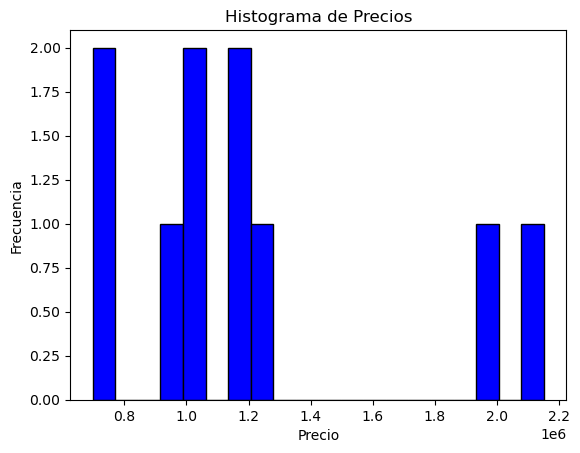

In [2]:
#Ejercicio 2 y 3
import requests
import pandas as pd
import matplotlib.pyplot as plt
url_base = "https://api.mercadolibre.com/sites/MLA/search"
params = {
    "q": "Apple Macbook Air",  
    "limit": 10
}
response = requests.get(url_base, params=params)
if response.status_code == 200:
    data = response.json()
    items = data.get("results", [])
    # Crear una lista para almacenar los precios de los ítems
    precios = []
    # Iterar sobre los ítems y guardar los precios en la lista
    for item in items:
        precio = item.get("price")
        if precio is not None:  # Verificar si el precio no es None
            precios.append(precio)
    # Crear un DataFrame a partir de la lista de precios
    df = pd.DataFrame({"Precio": precios})  
    # Calcular el precio promedio, mínimo y máximo
    precio_promedio = df["Precio"].mean()
    precio_minimo = df["Precio"].min()
    precio_maximo = df["Precio"].max() 
    # Imprimir los resultados
    print(f"Precio Promedio: {precio_promedio}")
    print(f"Precio Mínimo: {precio_minimo}")
    print(f"Precio Máximo: {precio_maximo}")
    
    # Crear un histograma de los precios
    plt.hist(precios, bins=20, color='blue', edgecolor='black')
    plt.title('Histograma de Precios')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()
    

    
else:
    print("Error al realizar la solicitud a la API")
